# Create RMG Thermo Library from DFT Data

In [1]:
import input_generator as ig
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'DFT_Data', 'Cu111'))

In [3]:
output_dir = os.path.abspath(os.path.join(os.getcwd(), 'generated_files'))

In [4]:
def count_atoms(molecule_name):
    atom_counts = {'H': 0, 'C': 0, 'N': 0, 'O': 0, 'Ag': 0}

    # Replace 'X' with 'Ag' for counting purposes
    molecule_name = molecule_name.replace('X', 'Ag')

    # Regex to find elements and their counts
    pattern = re.compile(r'(H|C|N|O|Ag)(\d*)')

    # Find all matches
    matches = pattern.findall(molecule_name)

    for element, count in matches:
        count = int(count) if count else 1
        if element in atom_counts:
            atom_counts[element] += count

    return atom_counts

In [5]:
def create_composition_list(base_dir):
    compositions = {}

    # Iterate through all folders in the base directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)

        if os.path.isdir(folder_path):
            # Assume folder name is the molecule name
            molecule_name = folder_name

            # Count atoms in the molecule name
            atom_counts = count_atoms(molecule_name)

            # Store the composition
            compositions[molecule_name] = atom_counts

    return compositions

In [6]:
compositions = create_composition_list(base_dir)
print(compositions)

{'CH2OHCHOX': {'H': 4, 'C': 2, 'N': 0, 'O': 2, 'Ag': 1}, 'CHX': {'H': 1, 'C': 1, 'N': 0, 'O': 0, 'Ag': 1}, 'COX': {'H': 0, 'C': 1, 'N': 0, 'O': 1, 'Ag': 1}, 'HCOOH': {'H': 2, 'C': 1, 'N': 0, 'O': 2, 'Ag': 0}, 'COHX': {'H': 1, 'C': 1, 'N': 0, 'O': 1, 'Ag': 1}, 'CH3OH': {'H': 4, 'C': 1, 'N': 0, 'O': 1, 'Ag': 0}, 'CH3CHOX': {'H': 4, 'C': 2, 'N': 0, 'O': 1, 'Ag': 1}, 'CHOHX': {'H': 2, 'C': 1, 'N': 0, 'O': 1, 'Ag': 1}, 'CHOCHOX_fcc': {'H': 2, 'C': 2, 'N': 0, 'O': 2, 'Ag': 1}, 'CHCHOX': {'H': 2, 'C': 2, 'N': 0, 'O': 1, 'Ag': 1}, 'CHOCHOX_top': {'H': 2, 'C': 2, 'N': 0, 'O': 2, 'Ag': 1}, 'COCHOX': {'H': 1, 'C': 2, 'N': 0, 'O': 2, 'Ag': 1}, 'COOHX': {'H': 1, 'C': 1, 'N': 0, 'O': 2, 'Ag': 1}, 'CH2CHOX': {'H': 3, 'C': 2, 'N': 0, 'O': 1, 'Ag': 1}, 'HCOOX': {'H': 1, 'C': 1, 'N': 0, 'O': 2, 'Ag': 1}, 'CH2O': {'H': 2, 'C': 1, 'N': 0, 'O': 1, 'Ag': 0}, 'CX': {'H': 0, 'C': 1, 'N': 0, 'O': 0, 'Ag': 1}, 'CHOHCHOX': {'H': 3, 'C': 2, 'N': 0, 'O': 2, 'Ag': 1}, 'CO2': {'H': 0, 'C': 1, 'N': 0, 'O': 2, 'Ag': 0

In [7]:
def generate_traj_ps(base_dir):
    traj_ps = []

    # Iterate through all folders in the base directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)

        if os.path.isdir(folder_path):
            # Assume folder name is the molecule name
            molecule_name = folder_name

            # Define expected filenames
            files = [
                f'structure_{molecule_name}.traj',
                f'zpe_log_{molecule_name}.txt',
            ]

            # Generate absolute paths for the files
            abs_paths = [os.path.abspath(os.path.join(folder_path, file)) for file in files]

            # Check if all files exist
            missing_files = [file for file in files if not os.path.isfile(os.path.join(folder_path, file))]

            if missing_files:
                print(f"Error: Missing files in folder '{folder_name}': {', '.join(missing_files)}")
            else:
                # Append filenames to traj_ps if all files are present
                traj_ps.append(abs_paths)

    return traj_ps

In [8]:
traj_ps = generate_traj_ps(base_dir)
print(traj_ps)

[['/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/CH2OHCHOX/structure_CH2OHCHOX.traj', '/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/CH2OHCHOX/zpe_log_CH2OHCHOX.txt'], ['/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/CHX/structure_CHX.traj', '/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/CHX/zpe_log_CHX.txt'], ['/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/COX/structure_COX.traj', '/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/COX/zpe_log_COX.txt'], ['/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/HCOOH/structure_HCOOH.traj', '/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/HCOOH/zpe_log_HCOOH.txt'], ['/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/COHX/structure_COHX.traj', '/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/COHX/zpe_log_COHX.txt'], ['/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/CH3OH/structure_CH3OH.traj', '/home/ssun30/Work/Electrocat/CO2_RR_DFT/DFT_Data/Cu111/CH3OH/zpe_log_CH

In [9]:
output_p = "recalc_dft_sp"

In [14]:
ig.input_generation(compositions, traj_ps, output_p, ocp=False)

-22.86715245


RuntimeError: Atoms object has no calculator.

In [31]:
def create_species_list(base_dir, output_file='sp_list.dat'):
    species_list = []

    # Iterate through all folders in the base directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)

        if os.path.isdir(folder_path):
            # Append the folder name with .dat to the list
            species_list.append(f"{folder_name}.dat")

    # Write the species list to a file
    with open(output_file, 'w') as file:
        for species in species_list:
            file.write(f"{species}\n")

    print(f"Species list has been written to {output_file}")

In [32]:
create_species_list(base_dir)

Species list has been written to sp_list.dat


successfully parsed file CHX.dat
266.8920748777955
266.8920748777955


/home/ssun30/Work/Electrocat/CO2_RR_DFT/Scripts/Convert_Traj_to_RMG_Thermo/Ag111/input_generator.py:330: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(min(molecule.H - molecule.heat_of_formation_298K)*0.9, max(molecule.H - molecule.heat_of_formation_298K)*1.025)


successfully parsed file COX.dat
switching to 2D-gas for 2 lowest modes for COX
-108.9773363003024
-108.9773363003024
successfully parsed file HCOOH.dat
switching to 2D-gas for 2 lowest modes for HCOOH
-384.47834265219973
-384.47834265219973
successfully parsed file COHX.dat
82.871126420471
82.871126420471
successfully parsed file CHOHX.dat
switching to 2D-gas for 2 lowest modes for CHOHX
-5.593706237726096
-5.593706237726096
successfully parsed file COOHX.dat
switching to 2D-gas for 2 lowest modes for COOHX
-342.0056839673983
-342.0056839673983
successfully parsed file HCOOX.dat
switching to 2D-gas for 2 lowest modes for HCOOX
-423.23608813775013
-423.23608813775013
successfully parsed file CX.dat
414.0368676758129
414.0368676758129
successfully parsed file CH3X.dat
switching to 2D-gas for 2 lowest modes for CH3X
46.5865405746141
46.586540574614105
successfully parsed file CHOX.dat
switching to 2D-gas for 2 lowest modes for CHOX
-62.43313610213052
-62.43313610213052
successfully parse

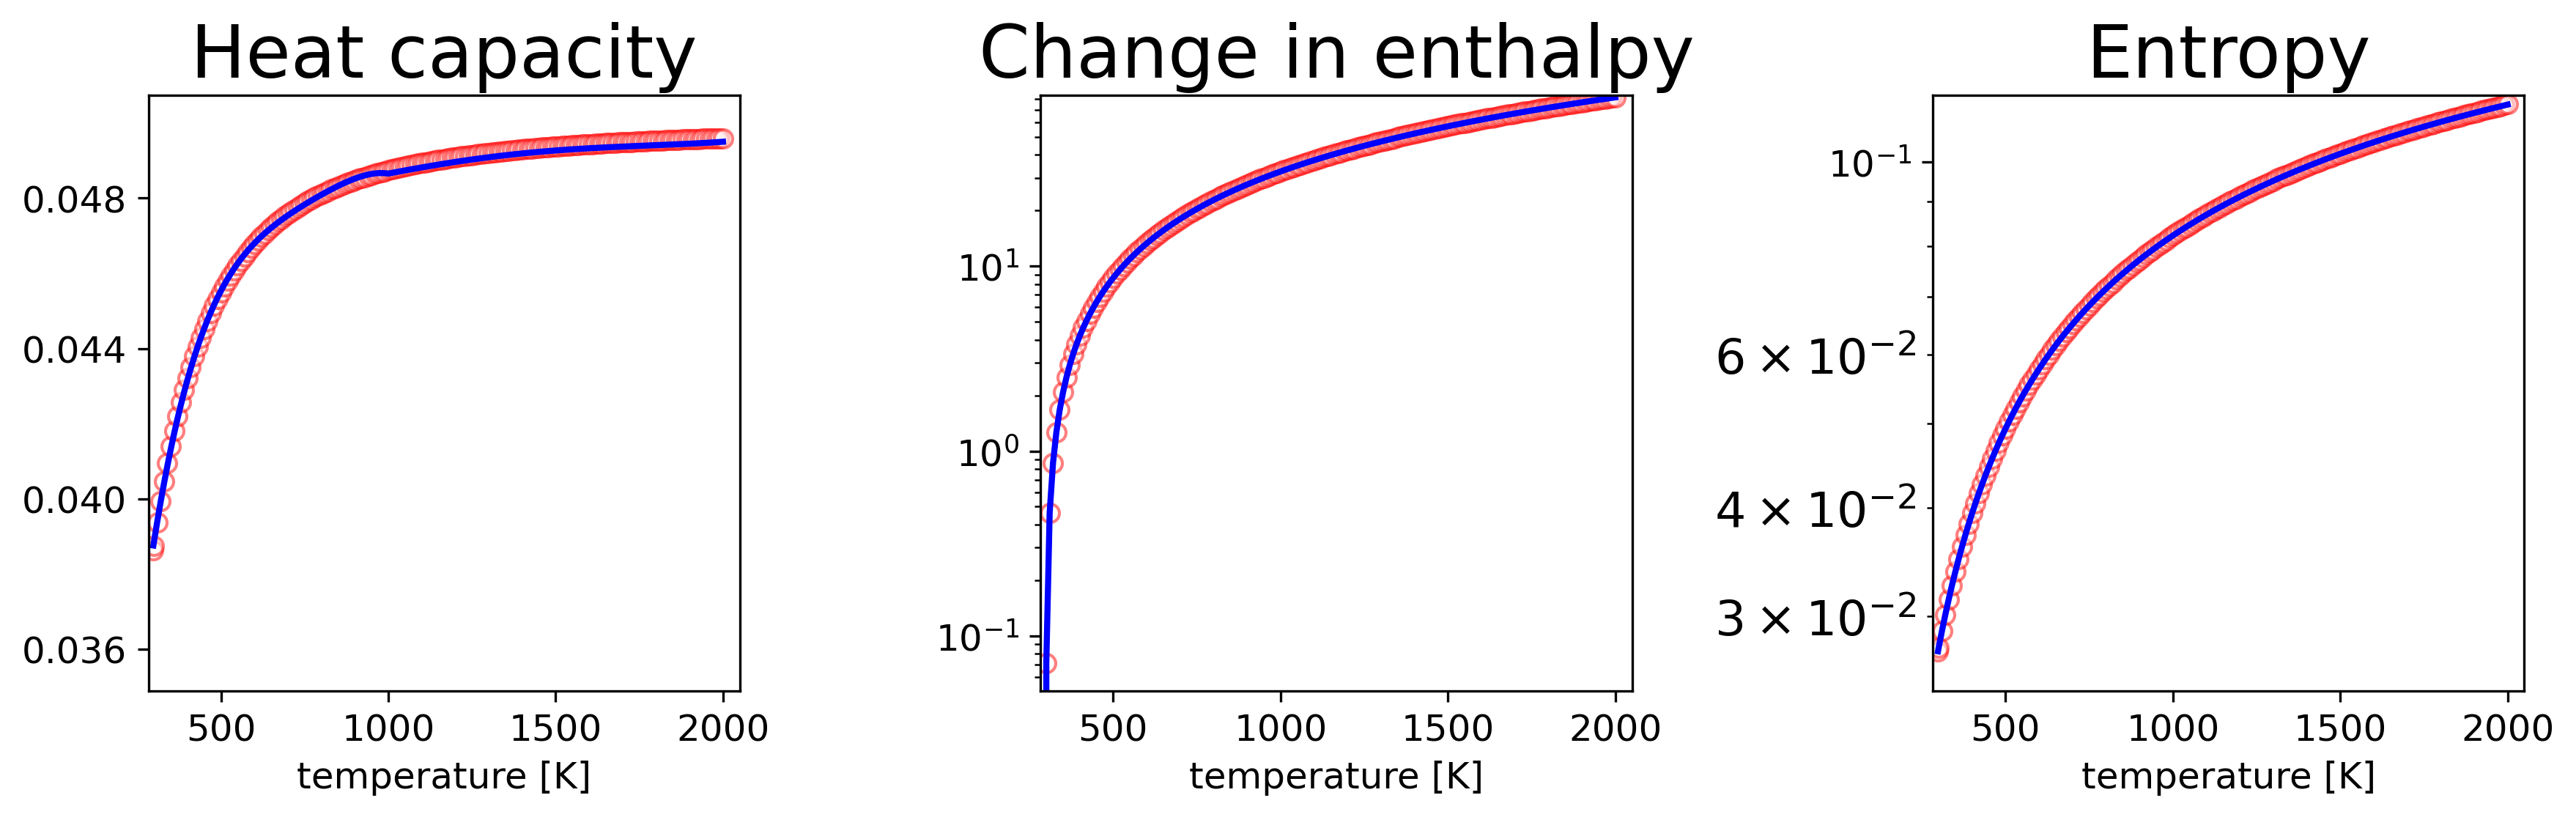

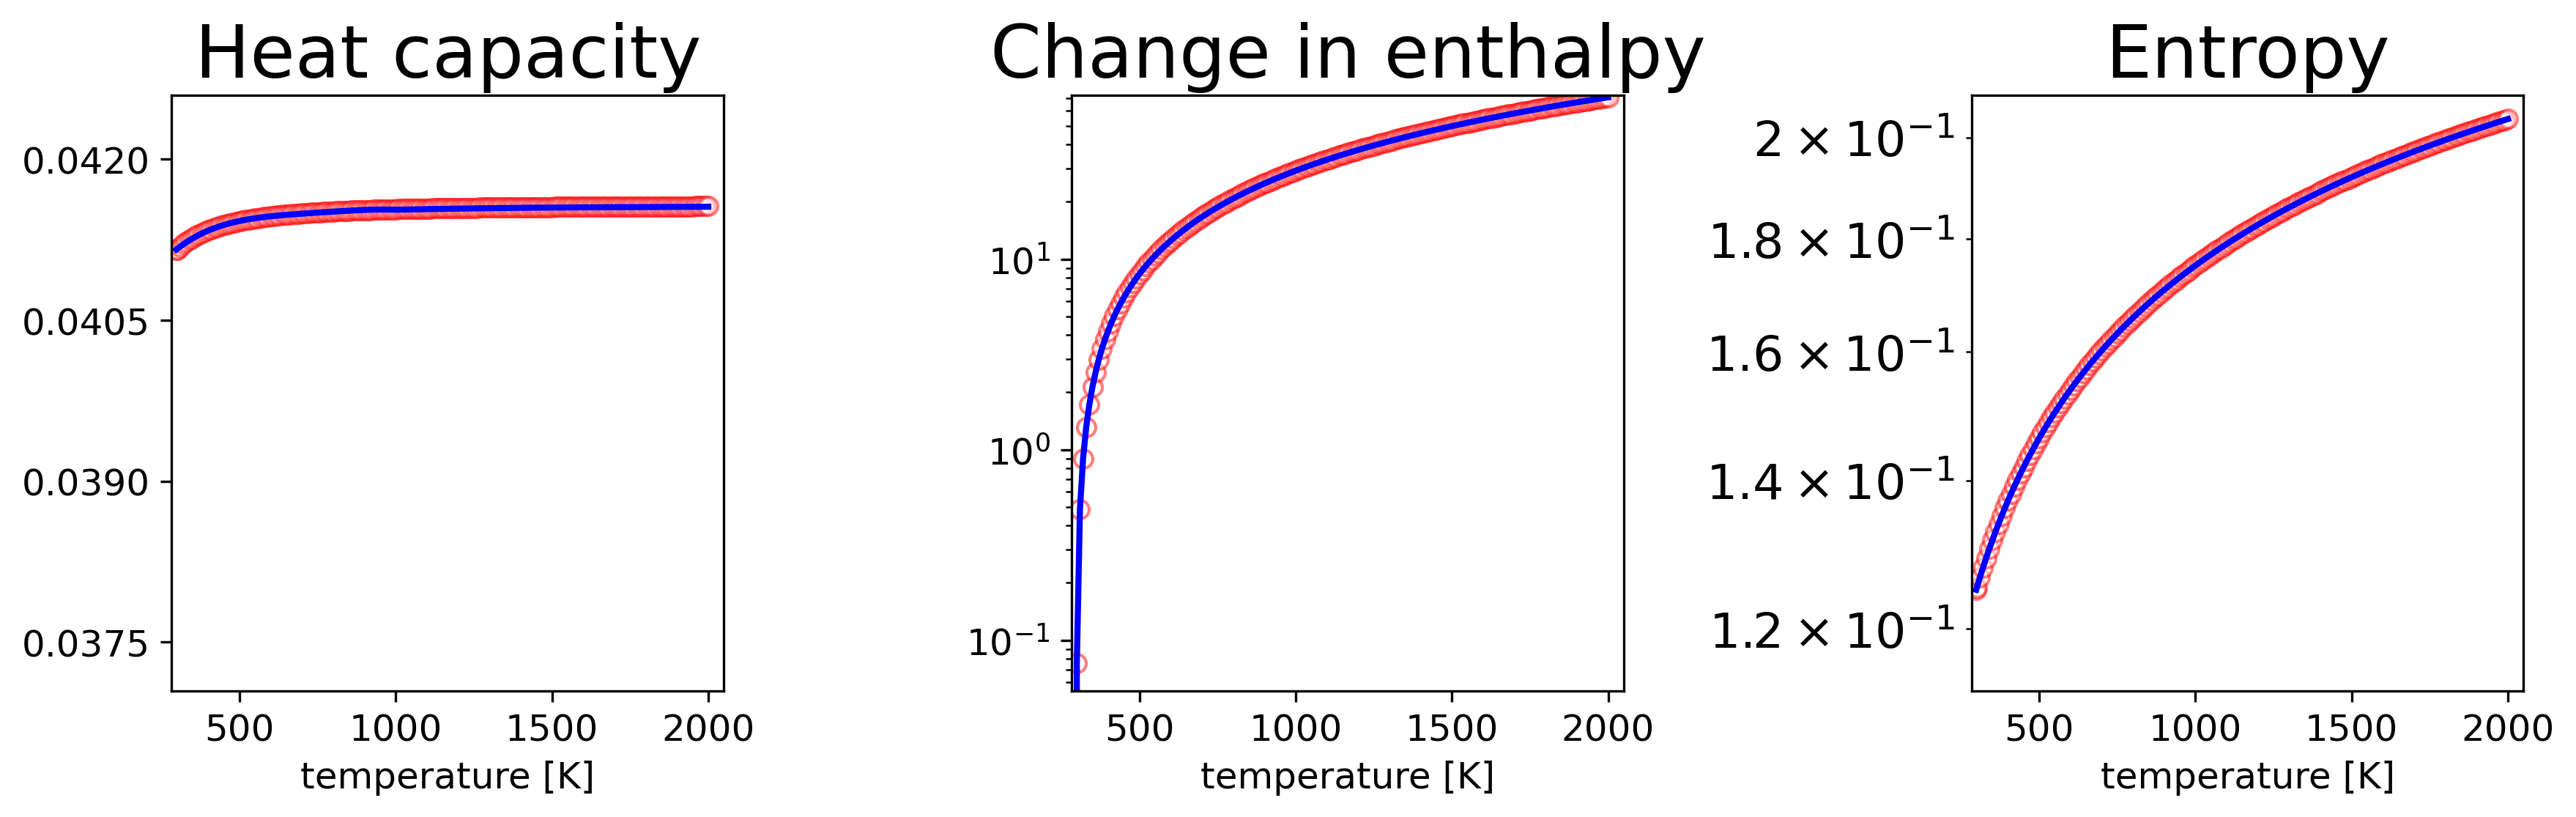

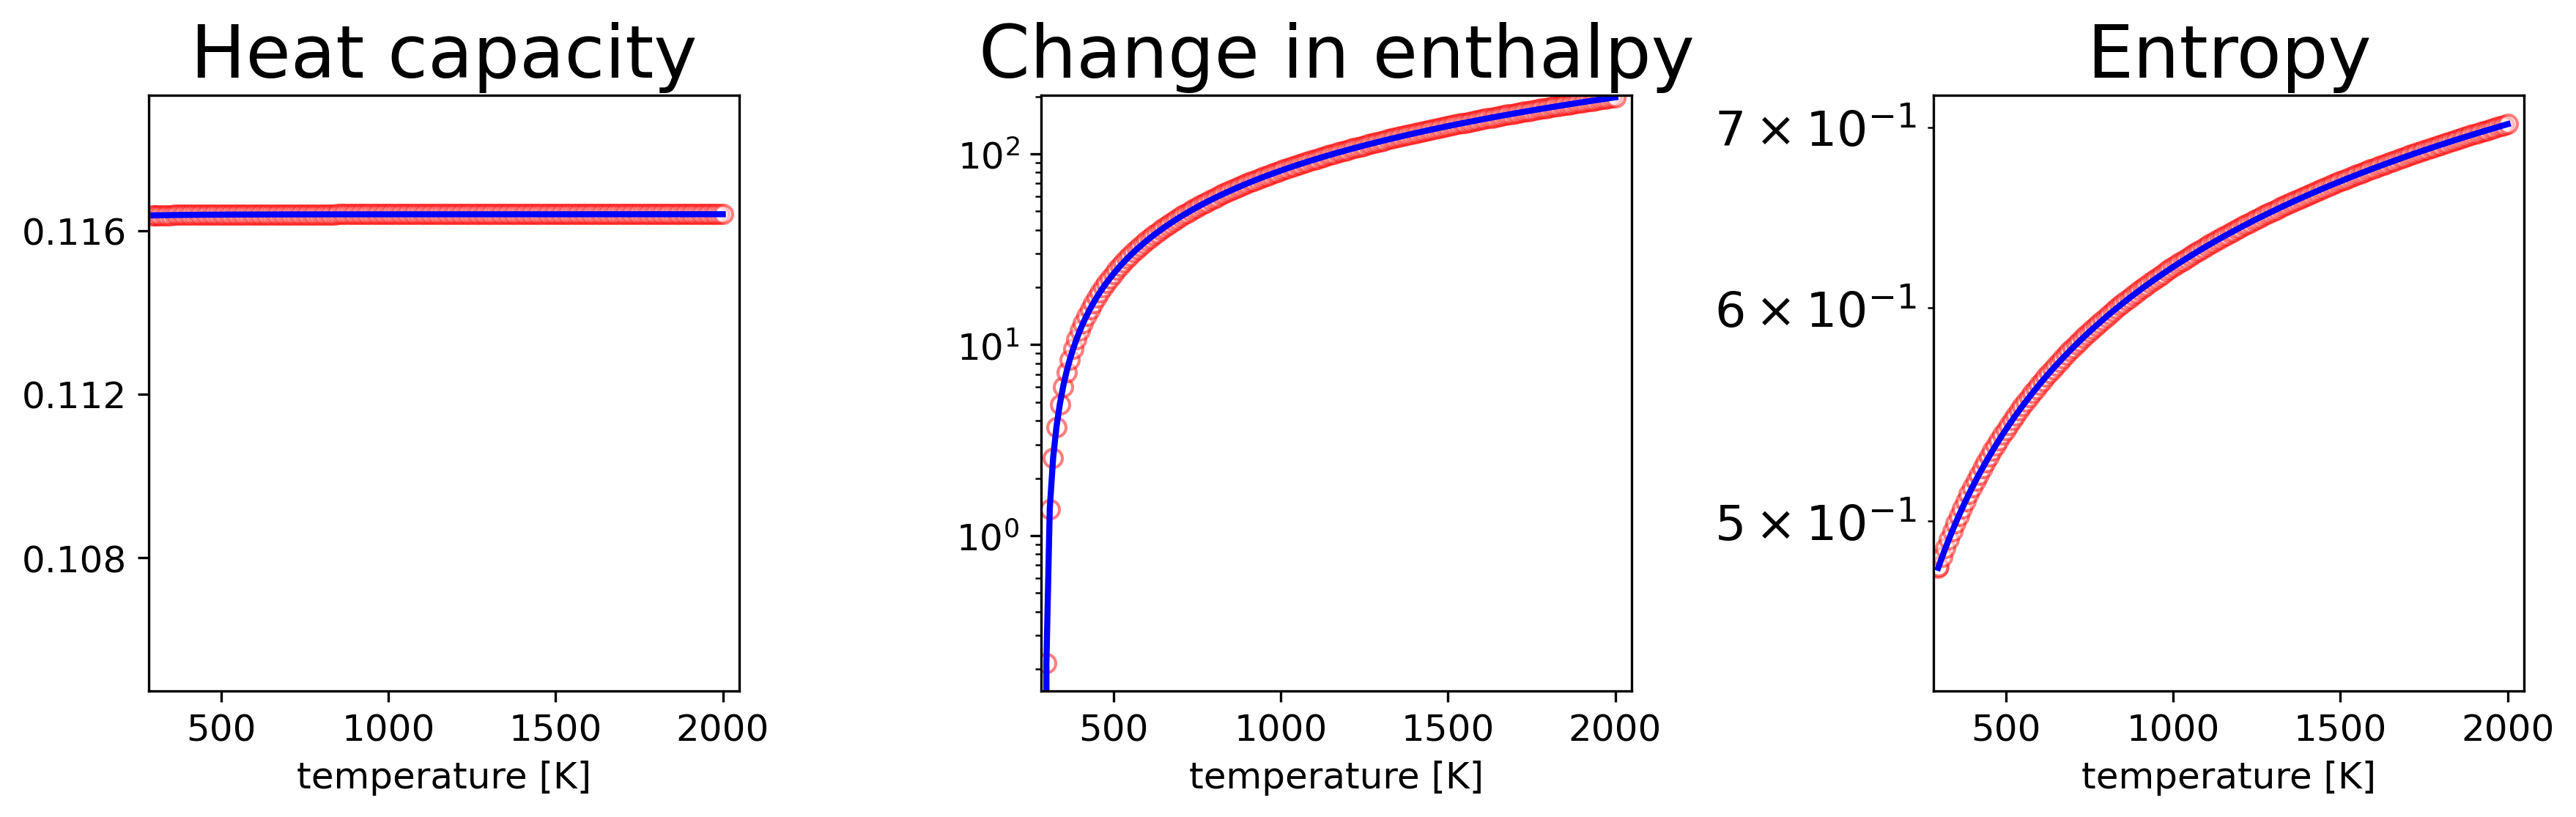

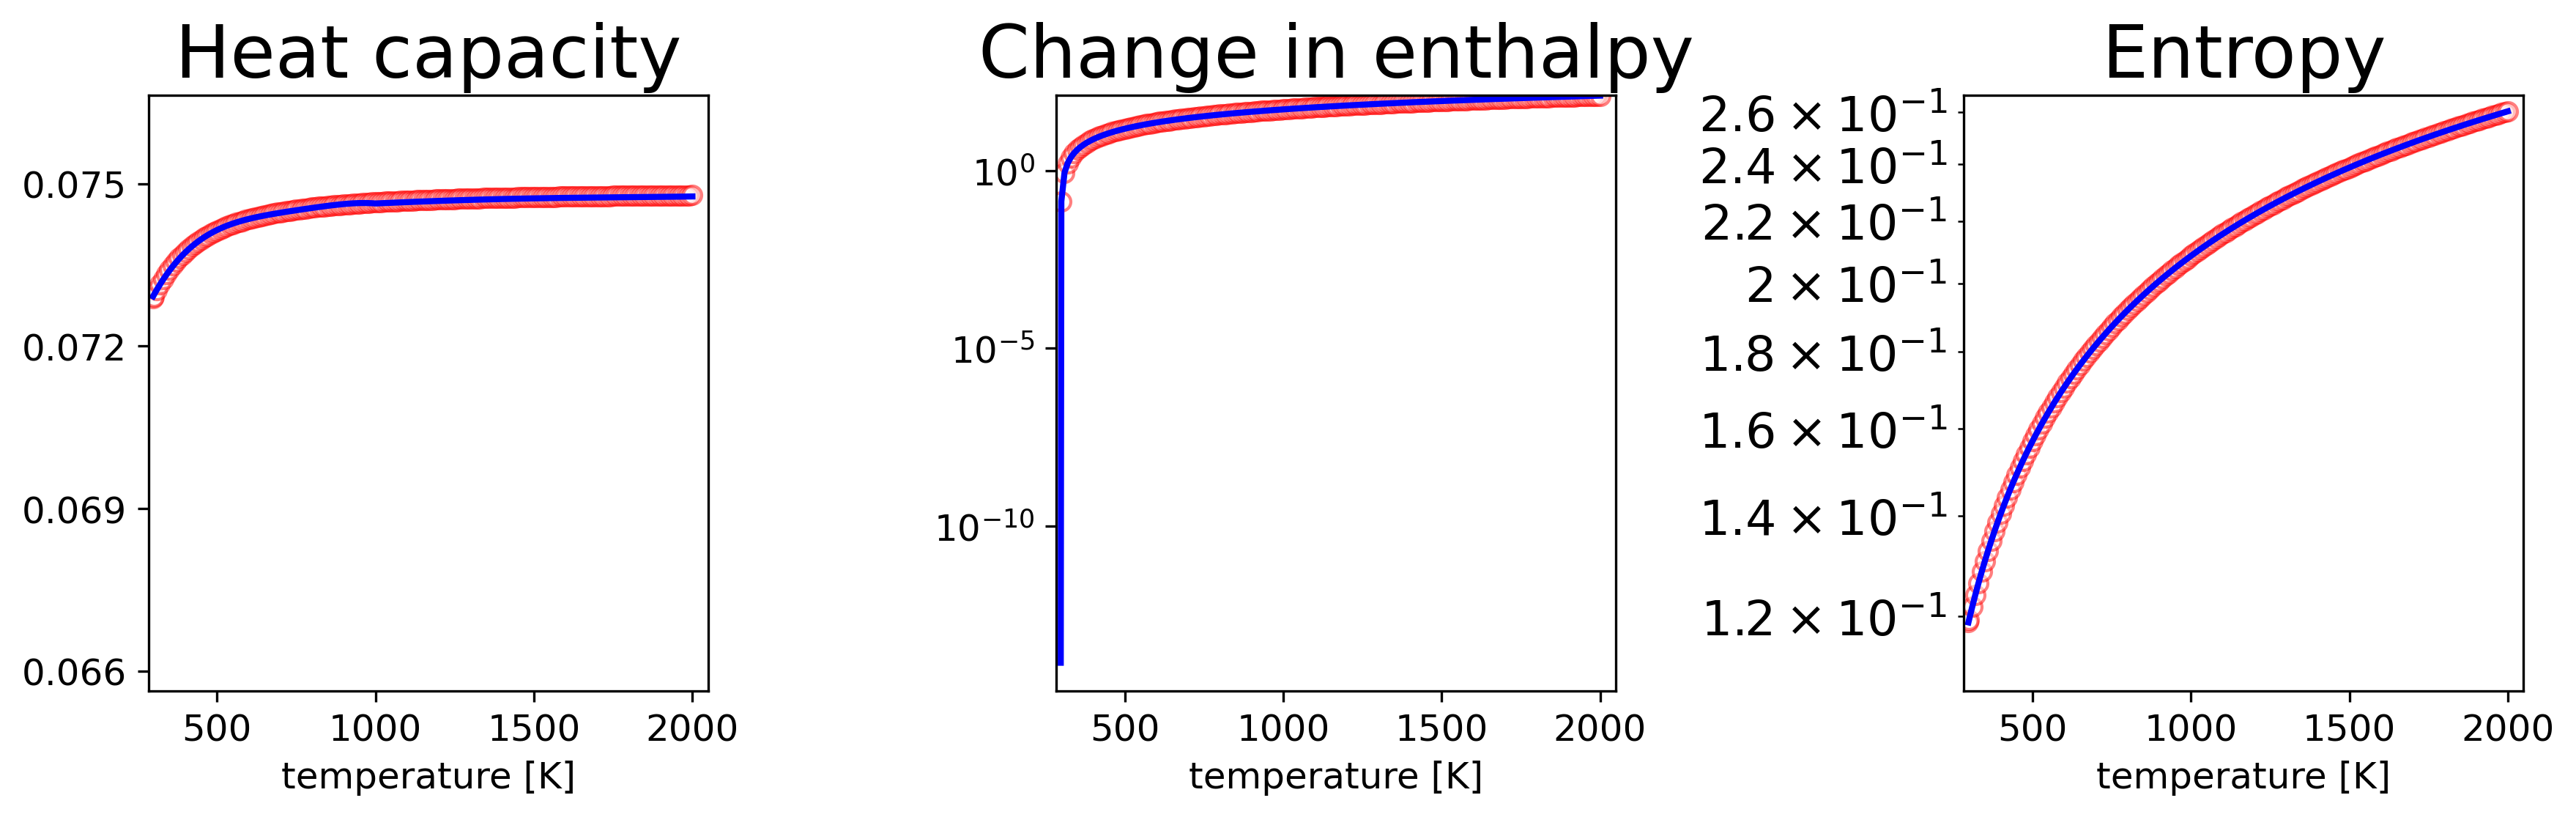

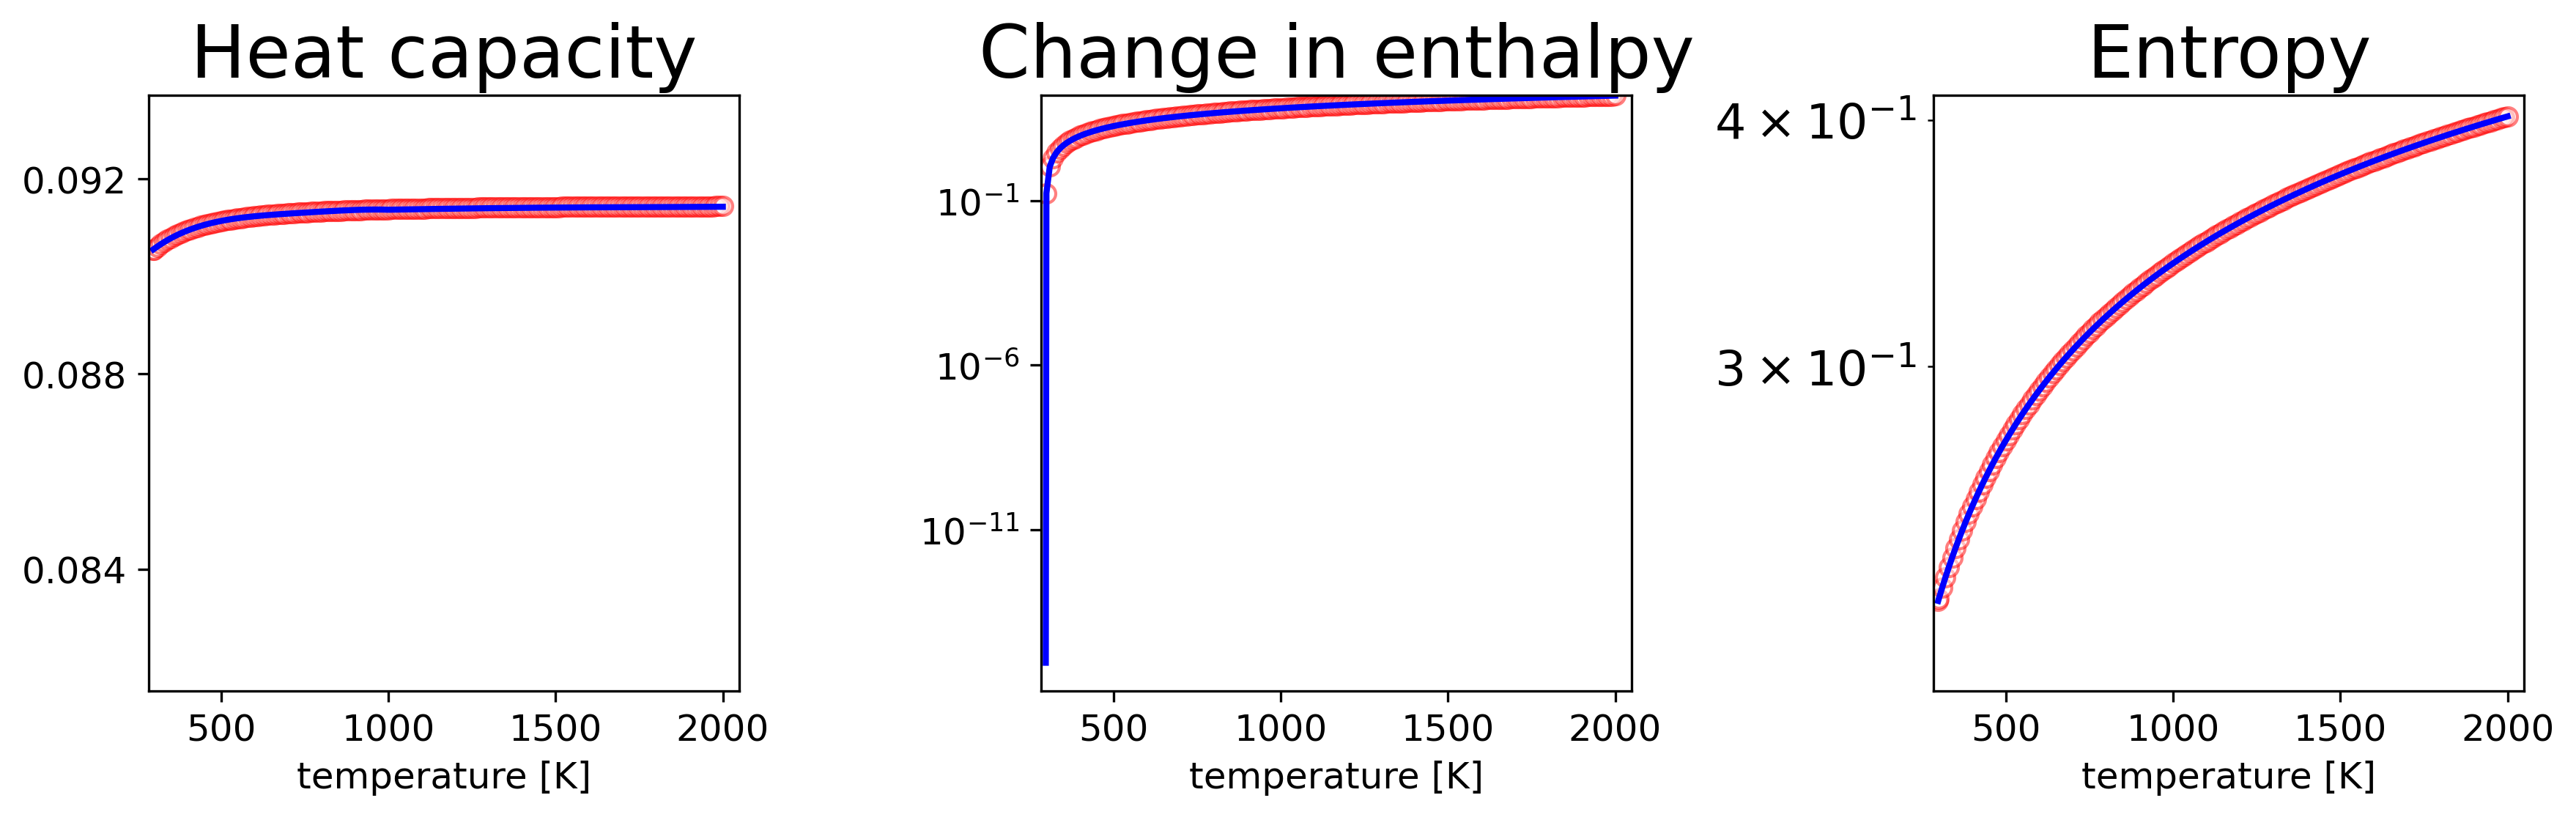

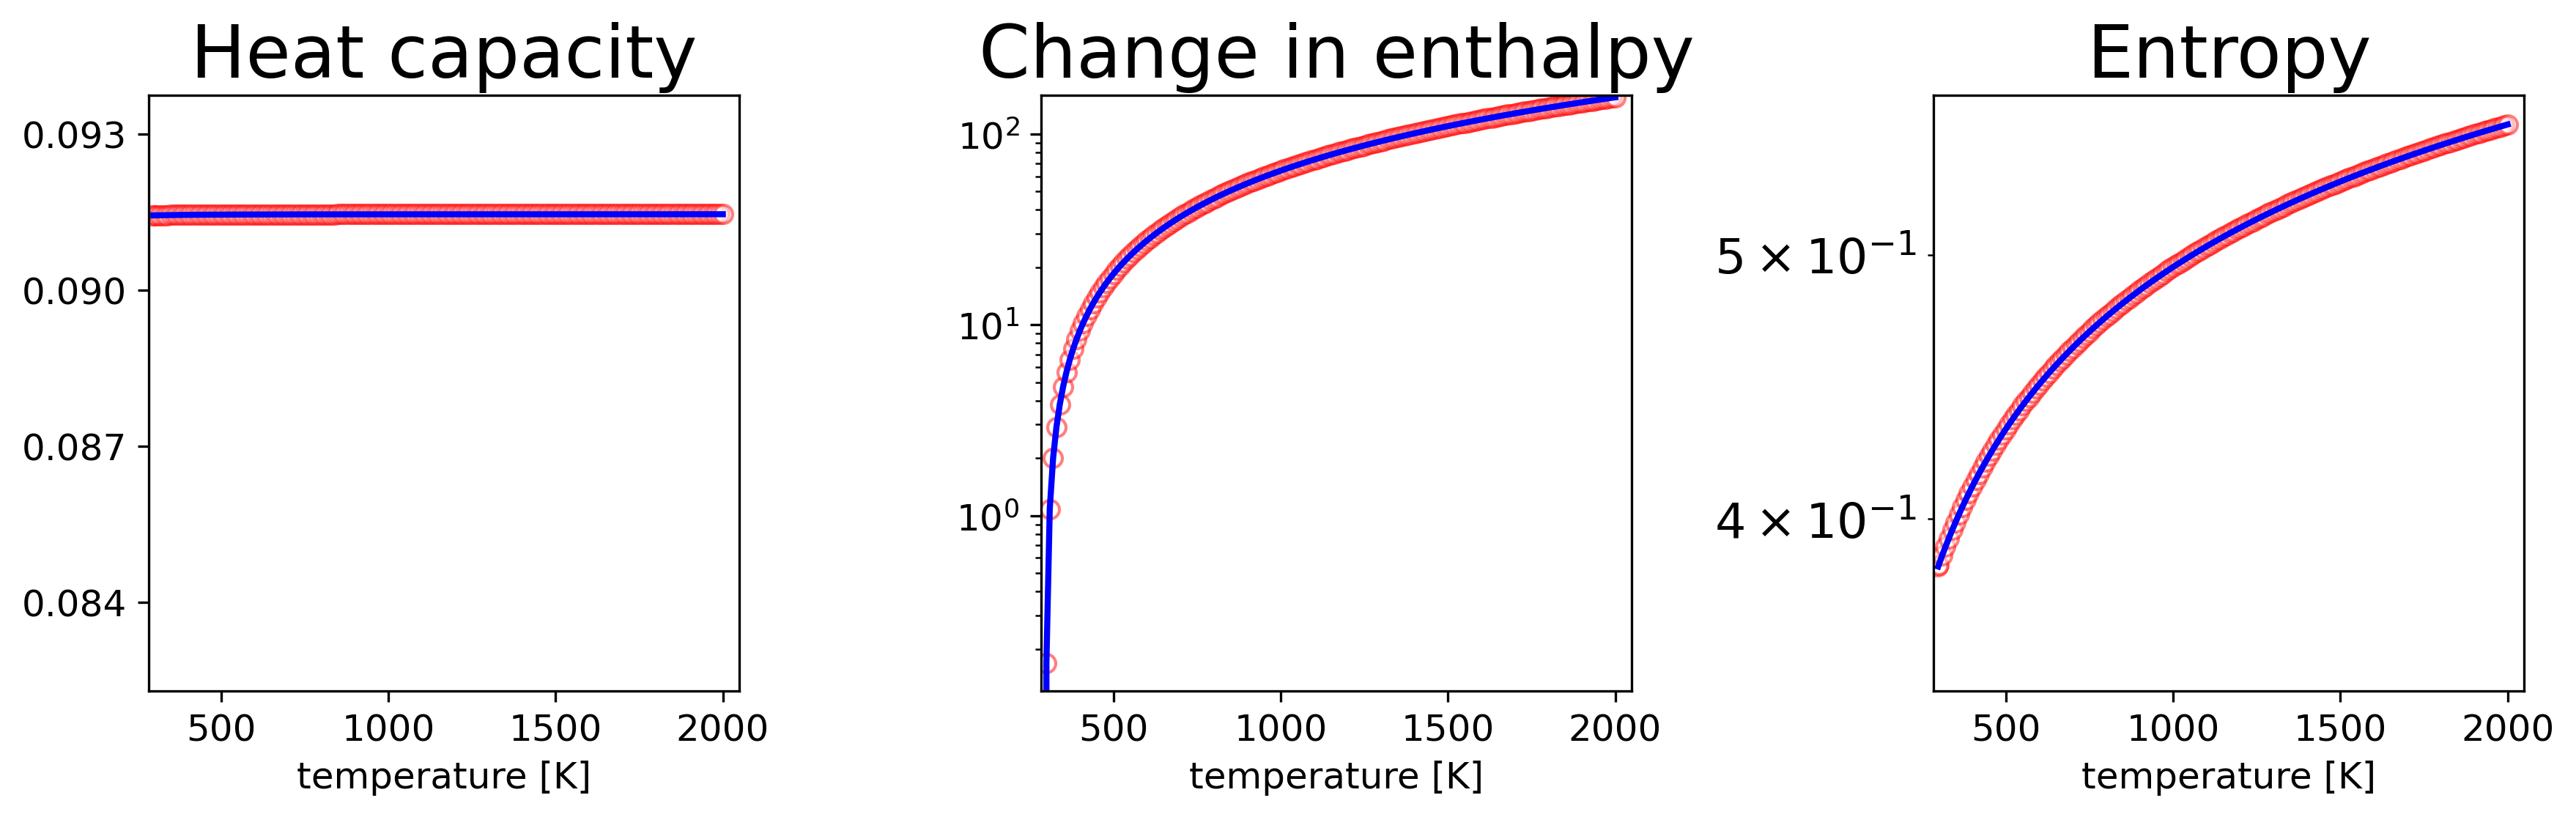

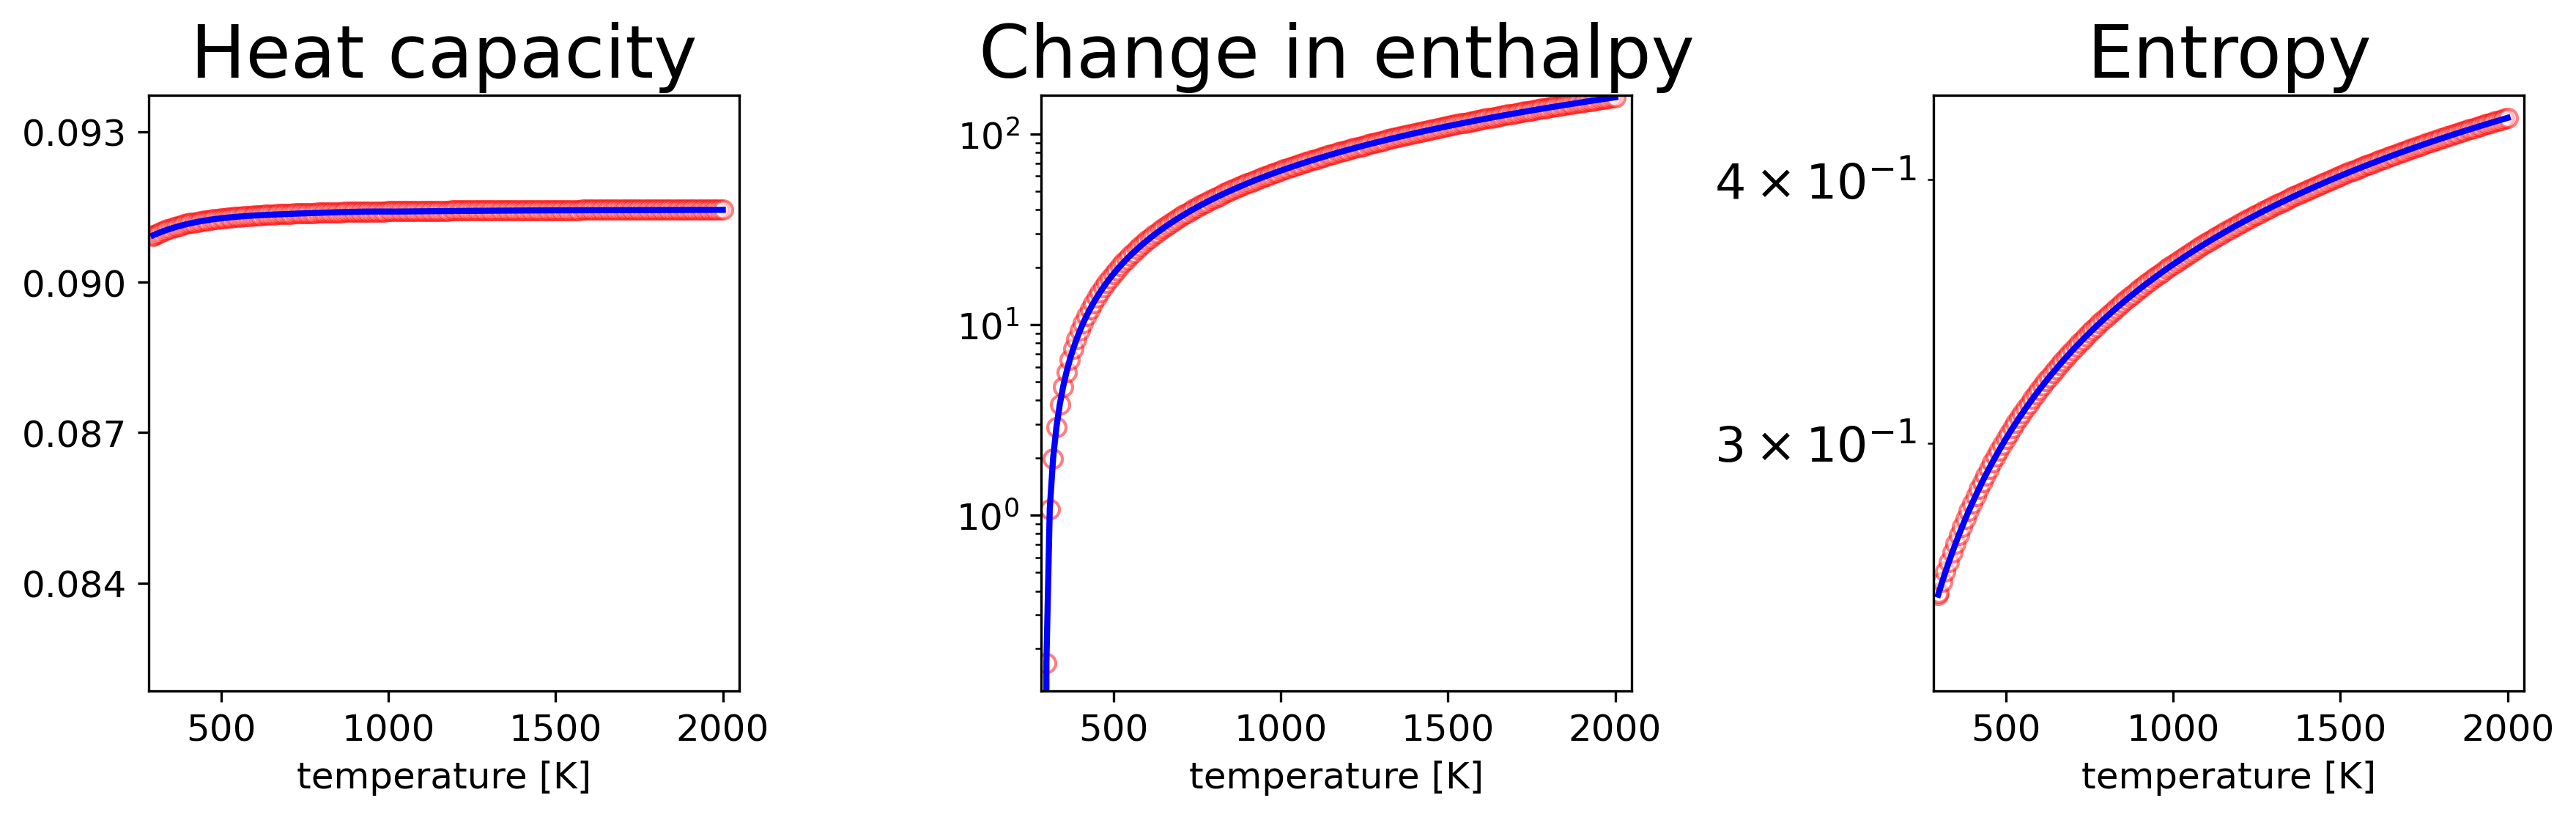

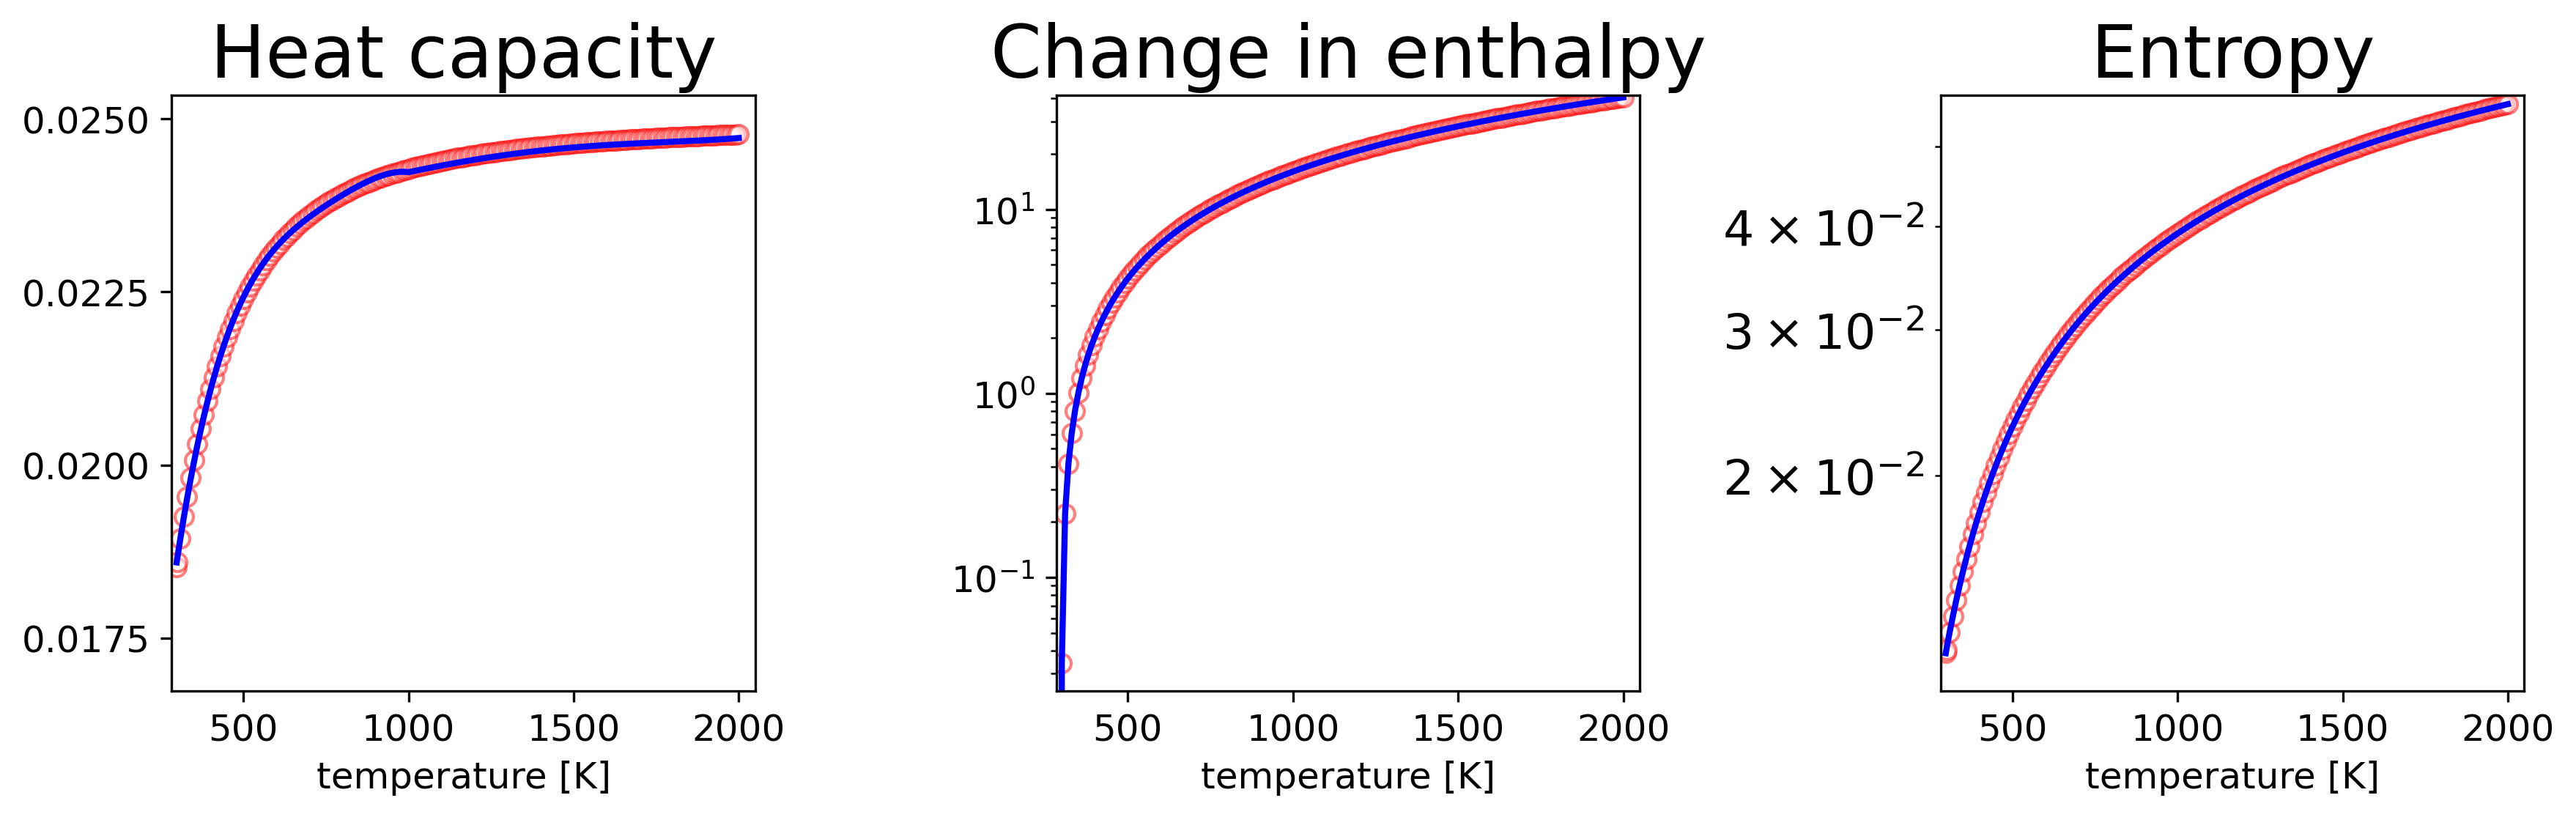

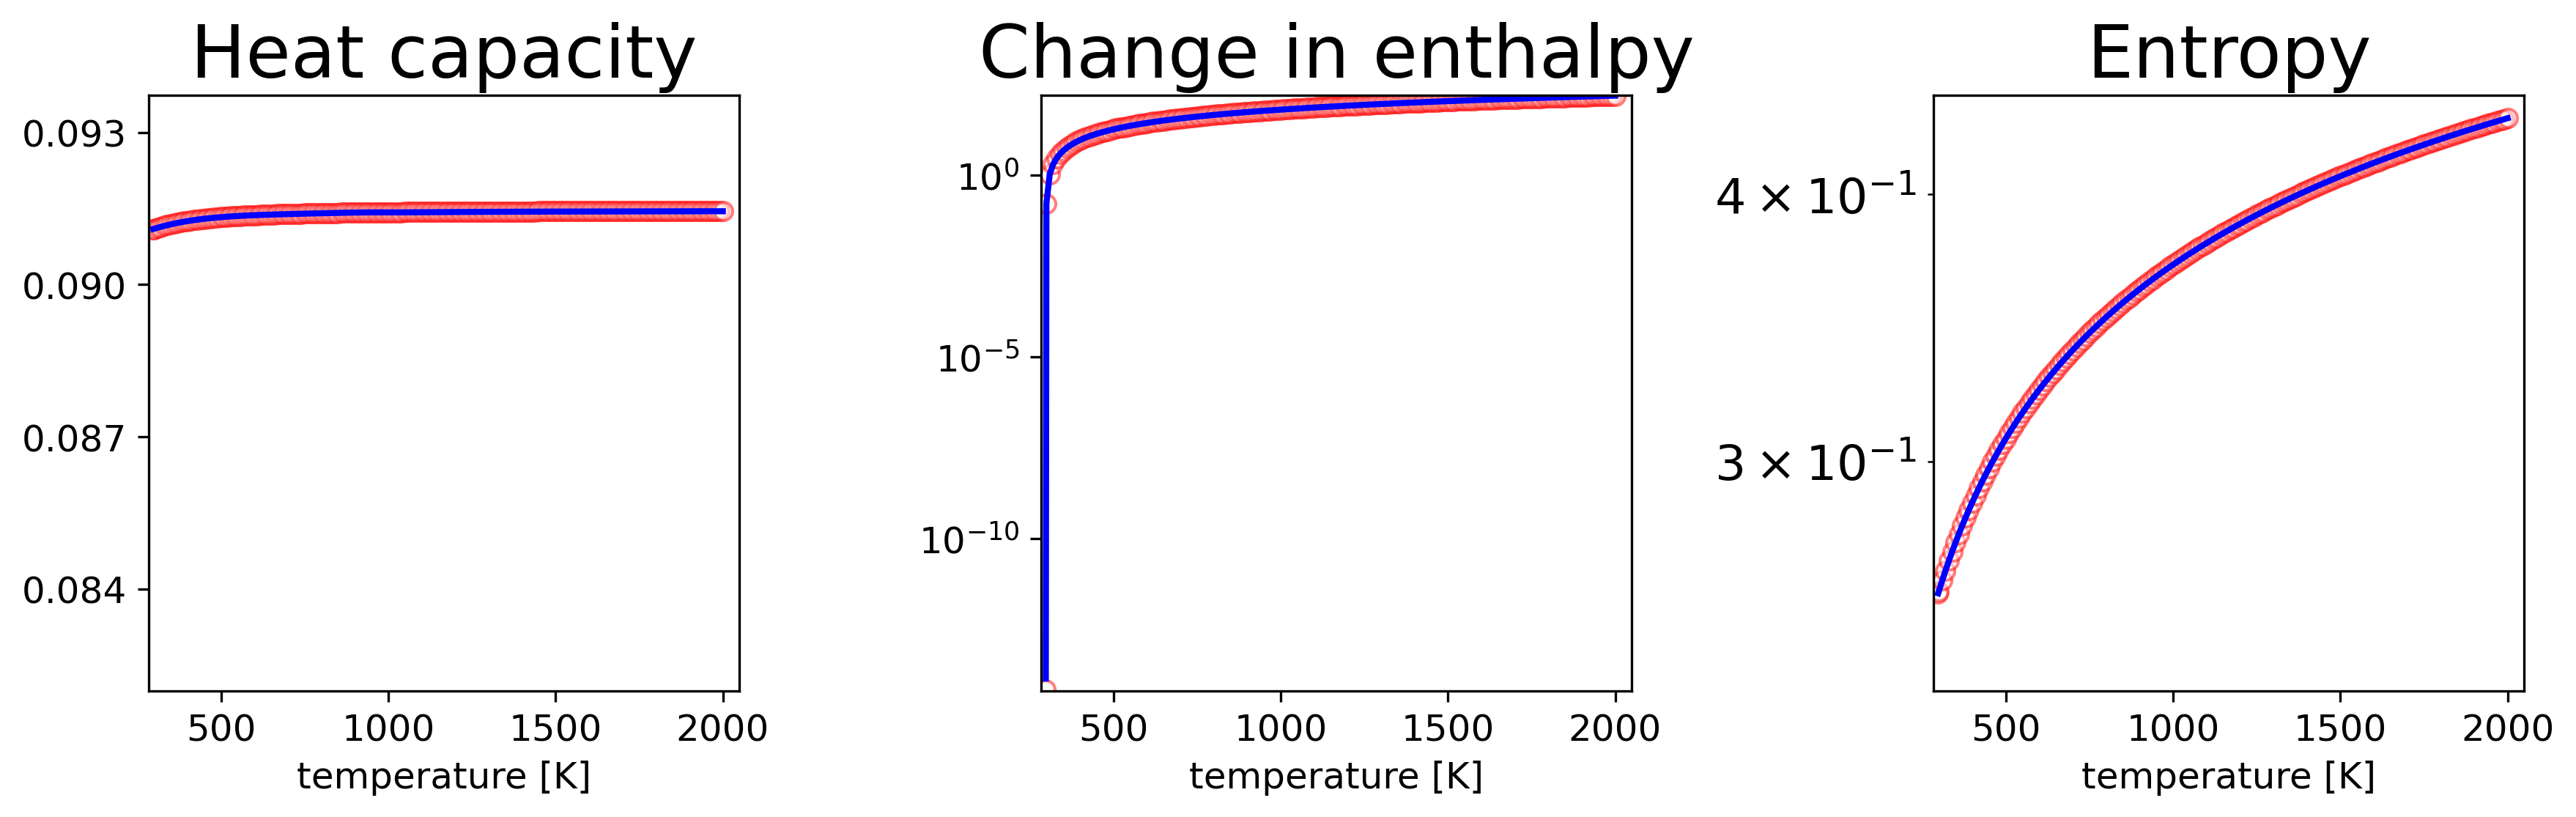

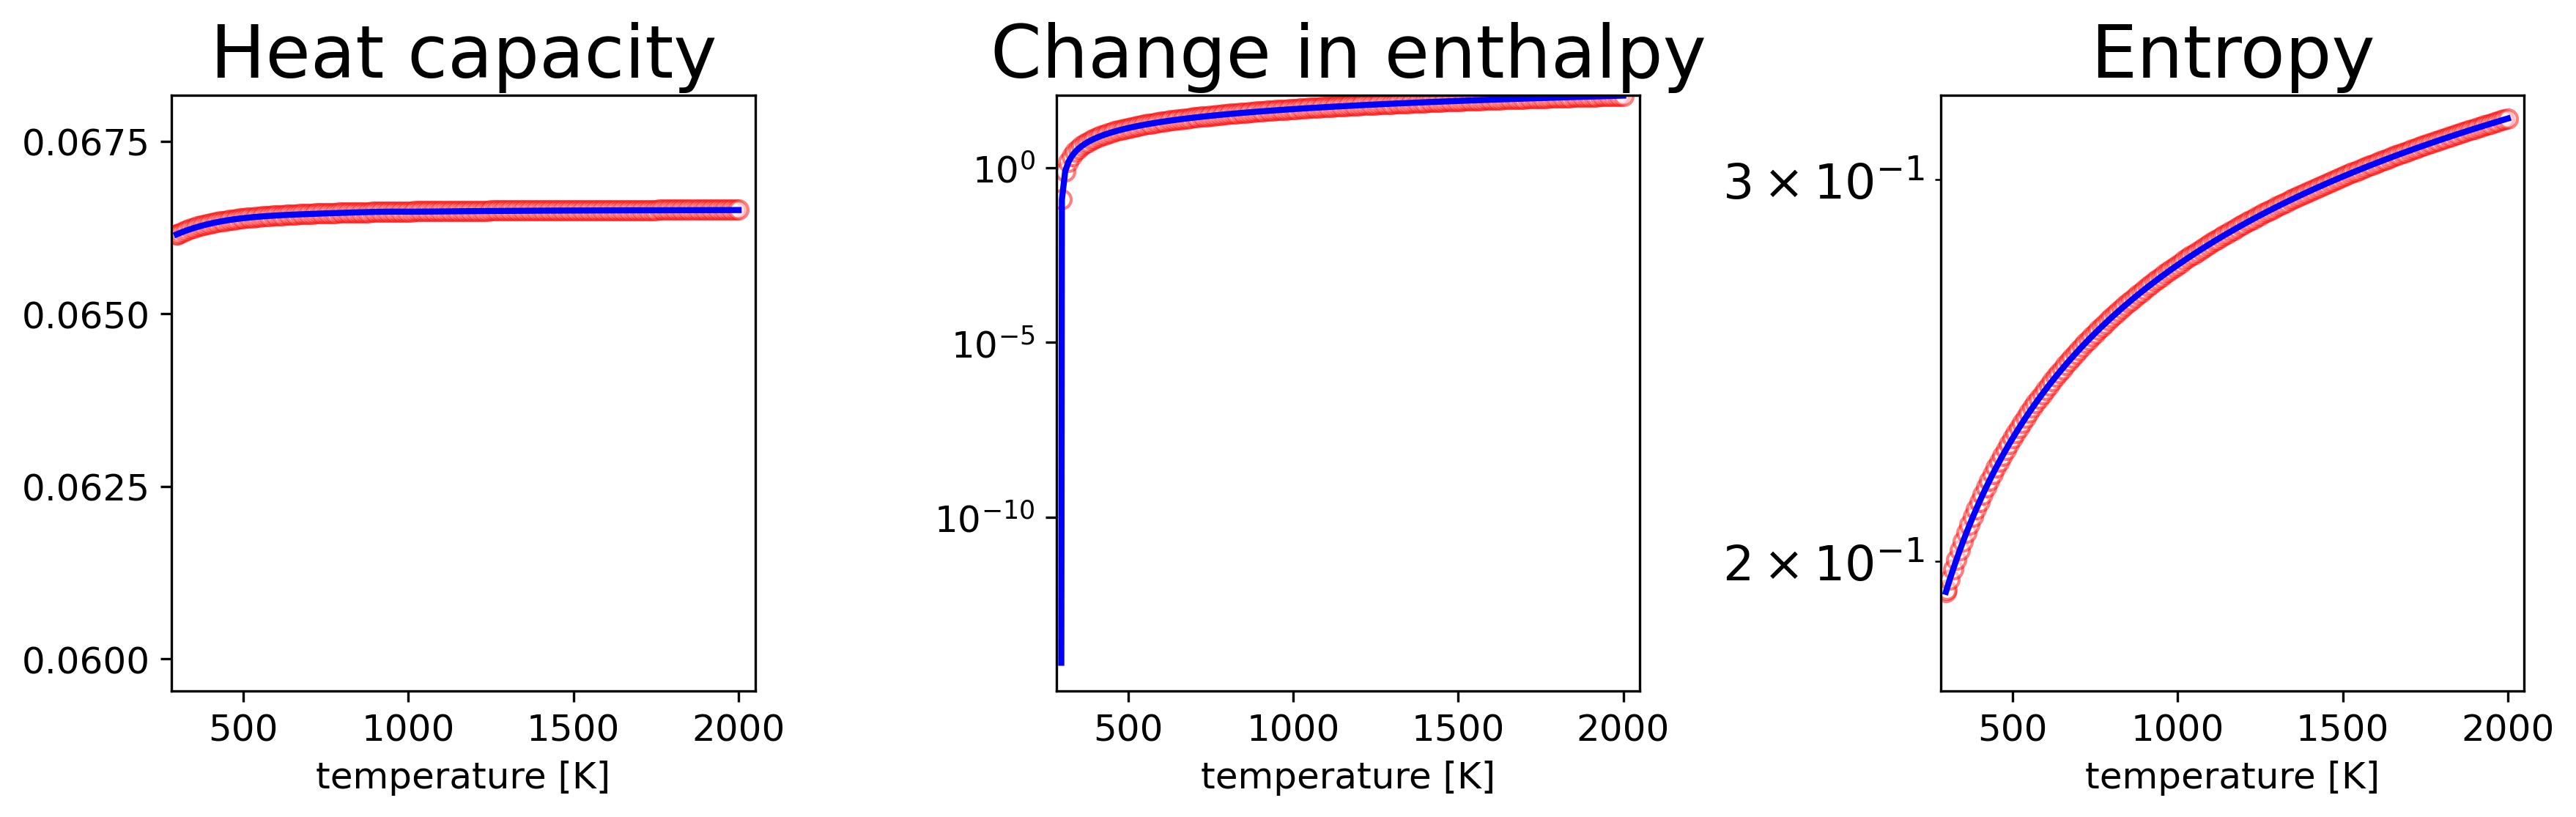

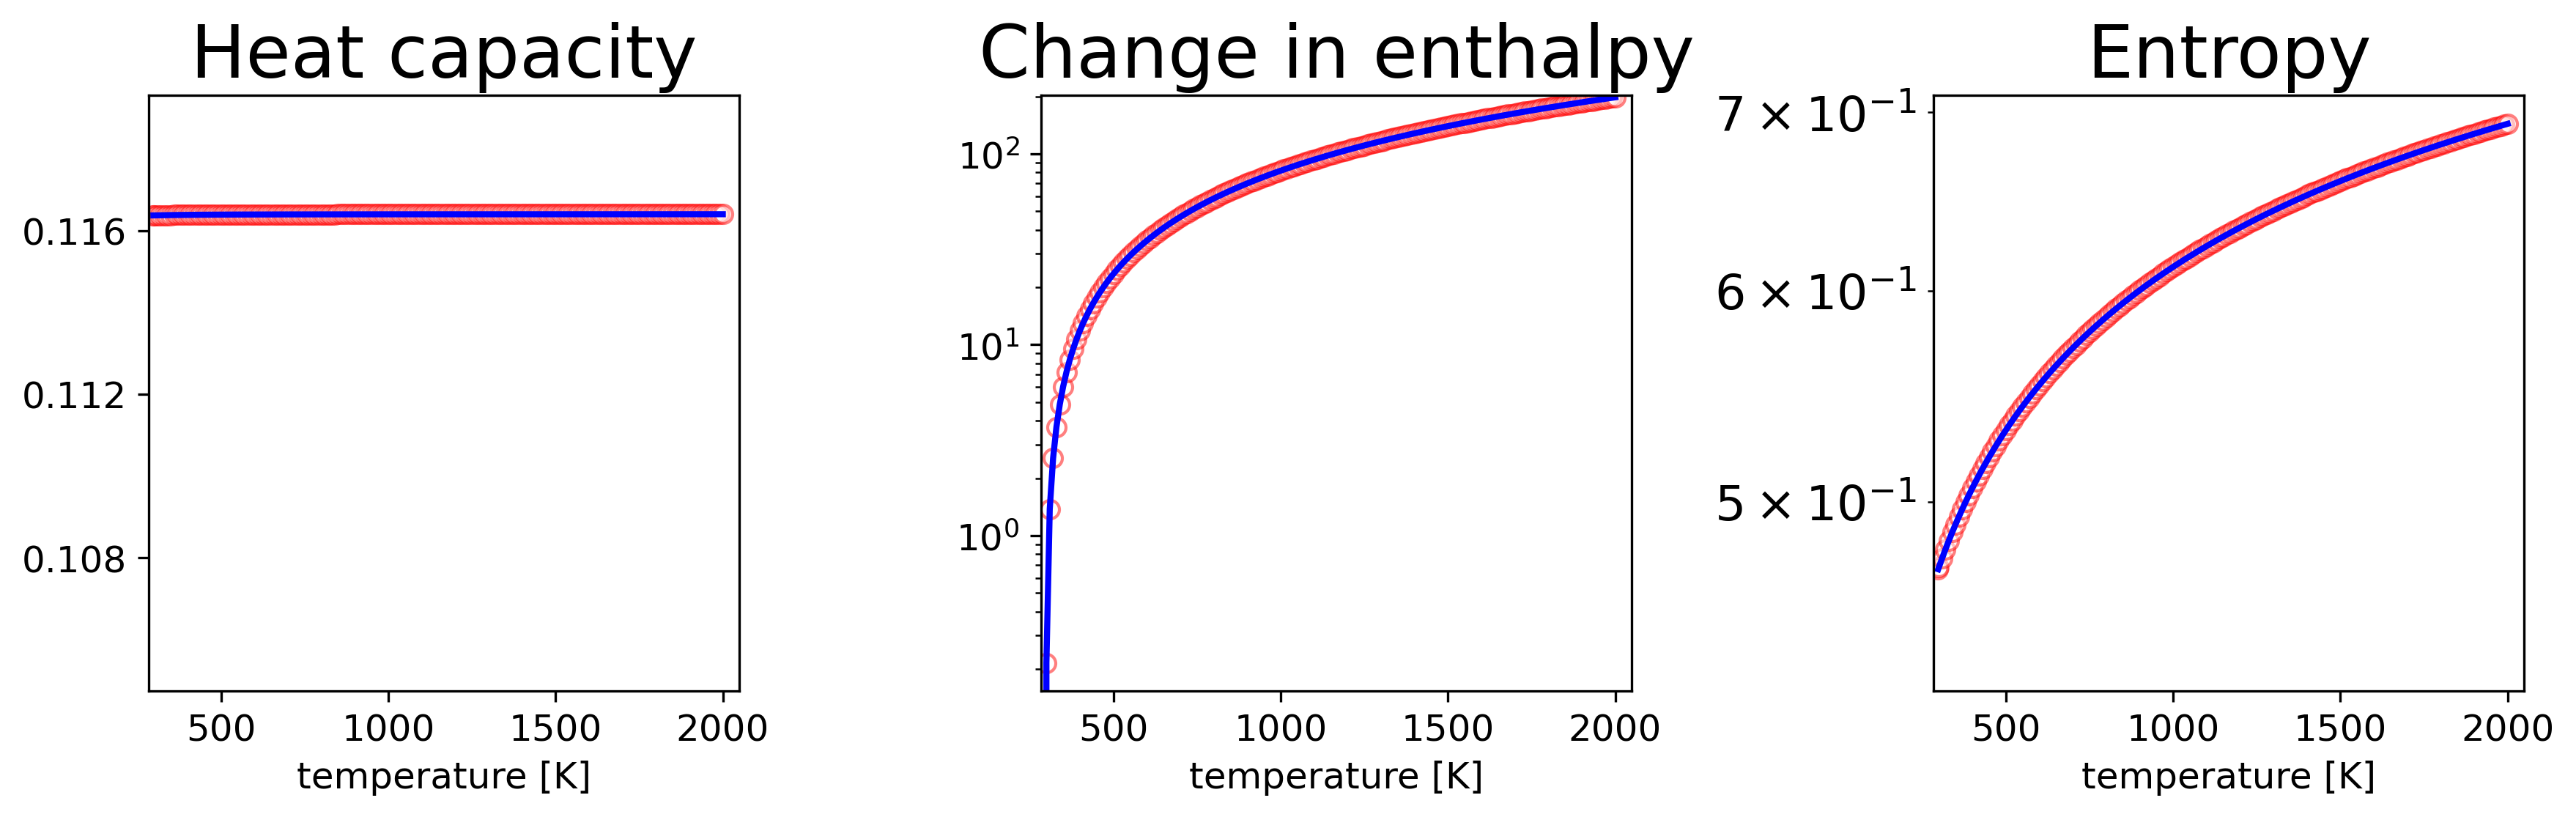

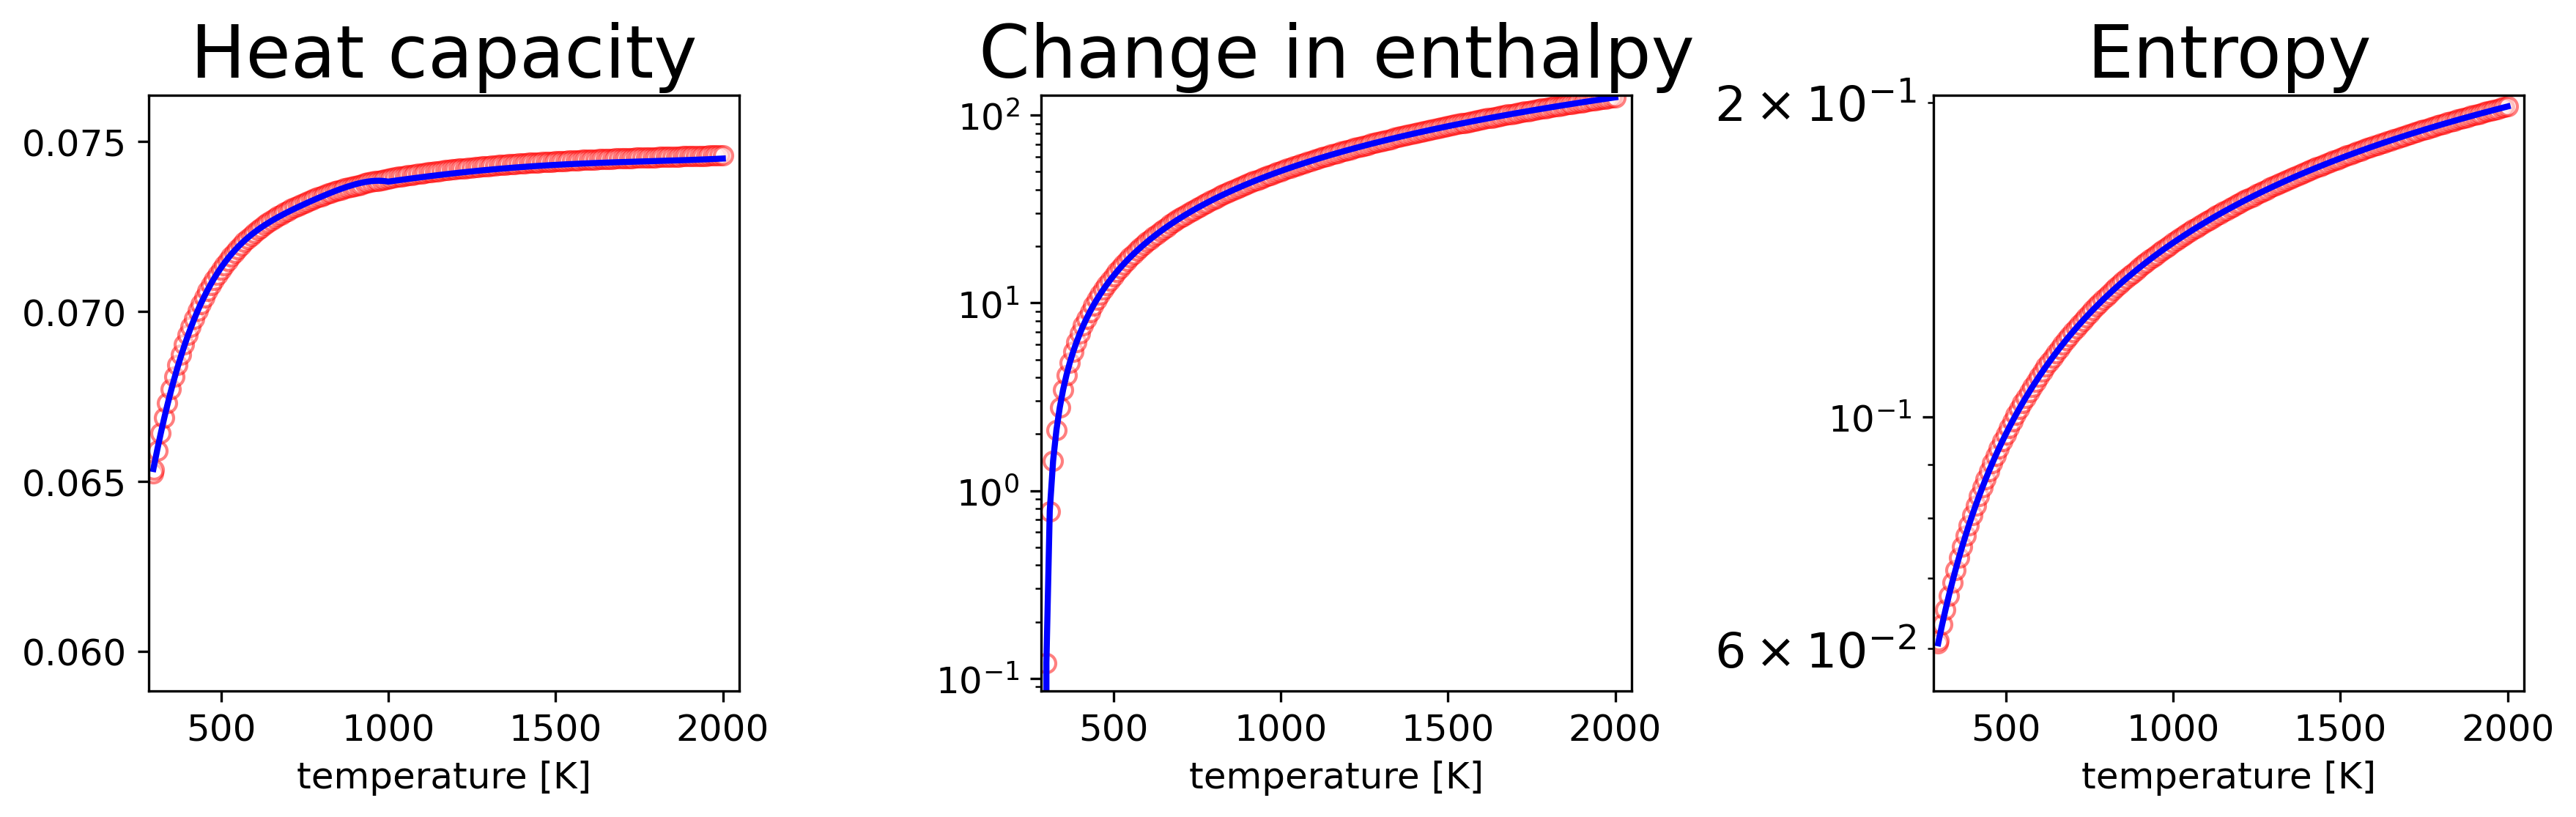

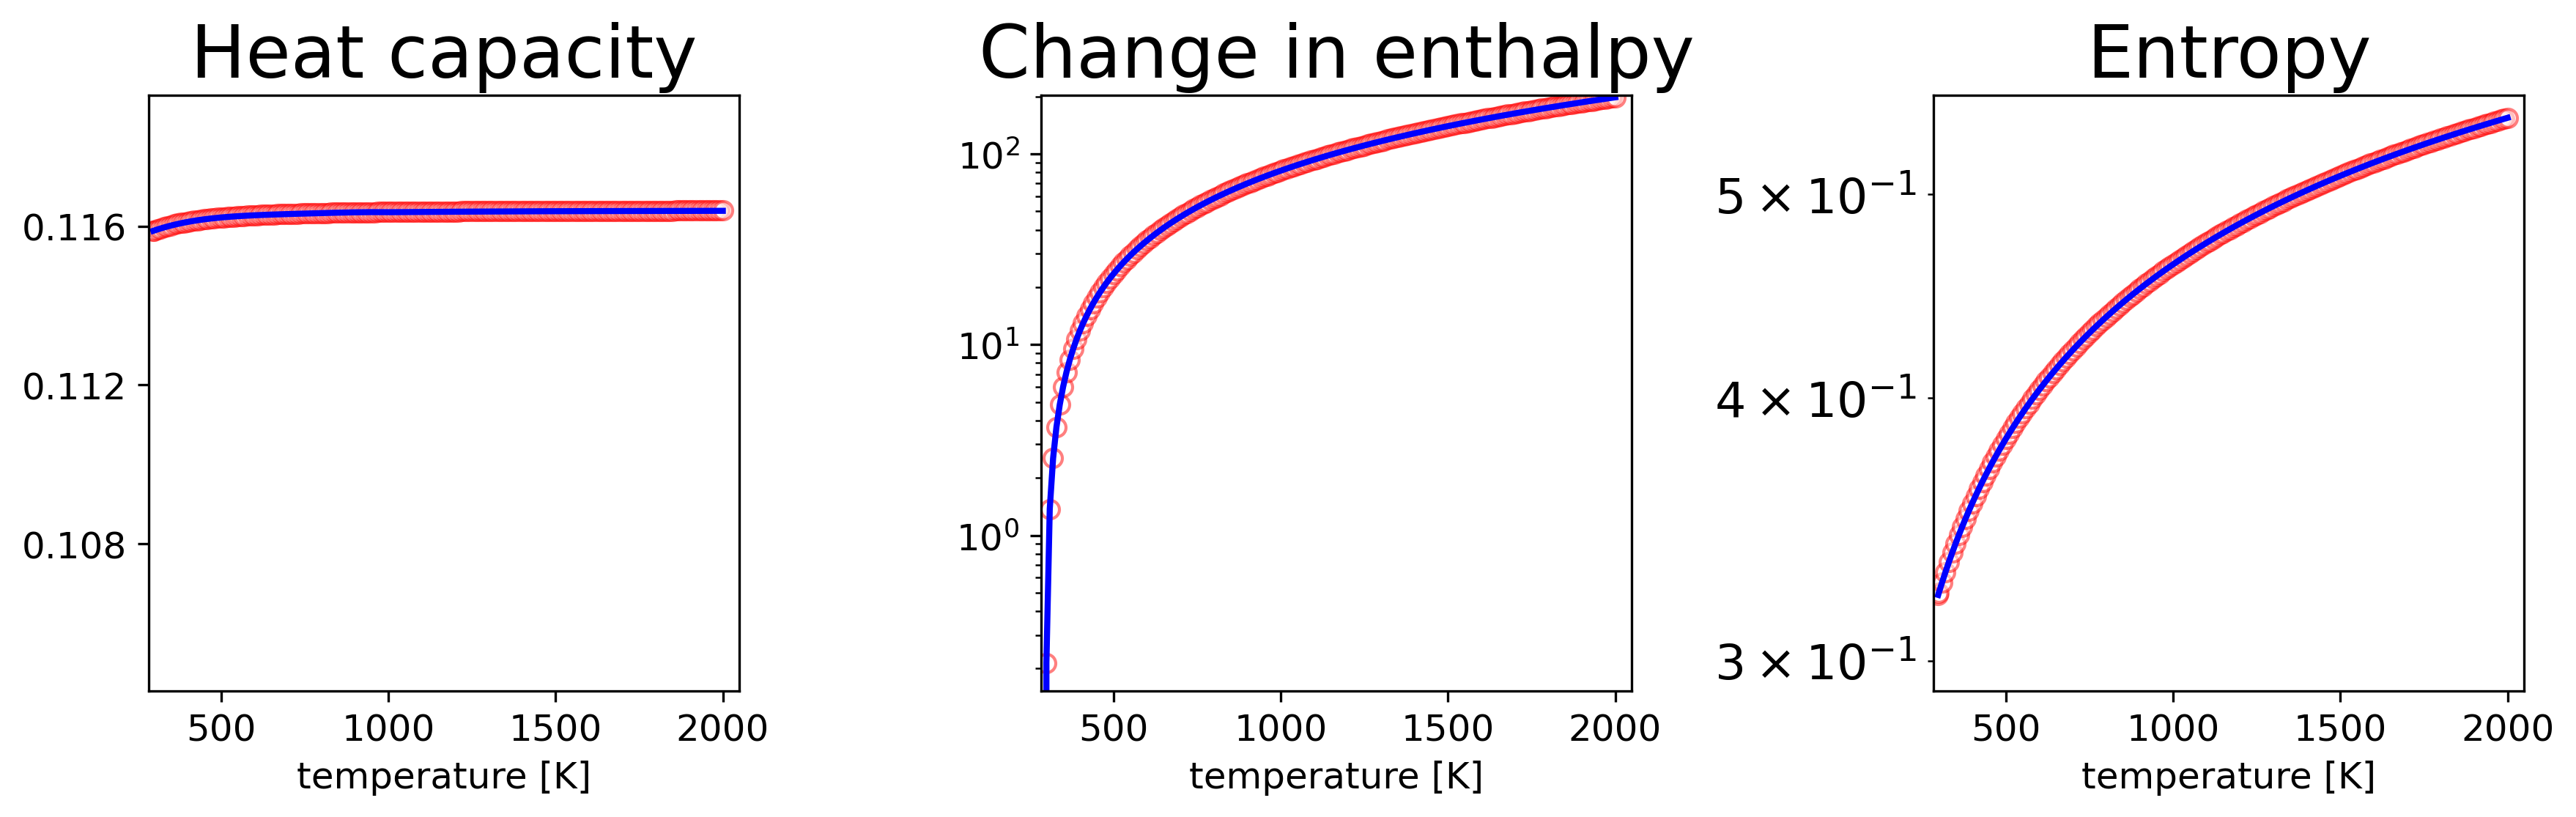

In [ ]:
# create the array of temperatures in 10 degree increments
temperature = [298.15] #NOTE 298.15 must be first for the NASA polynomial routine to work!
T_low = 300.0
T_high = 2000.0
dT = 10.0 #temperature increment
temperature = np.append(temperature, np.arange(T_low, T_high+dT, dT))

list_of_species = 'sp_list.dat'
element = 'recalc_dft_sp'
info = open(list_of_species,'r')
species_list = info.readlines()
info.close()

new_output = open('dft_recalc.txt', 'w')

name_line = '\n'
species_line = '\n'

counter = -1
for species in species_list:
    counter += 1
    filename = species.strip()
    test = ig.Molecule()
    ig.parse_input_file(filename, test, element)
    ig.thermo(test, temperature)

    name_line += ' %s'%(test.name)
    if counter == 4:
        name_line +='\n'
        counter == -1
    species_line += test.species_lines

    ig.get_thermo_from_NASA(temperature, test)
    ig.compare_NASA_to_thermo(temperature, test)

name_line += '\n\n'
# new_output.write(name_line)
new_output.write(species_line)

new_output.close()

In [34]:
def update_long_desc(file_path):
    # Define the new longDesc content
    new_long_desc = (
        'Calculated by Su Sun at Northeastern University using Statistical Mechanics. '
        'Based on DFT calculations by Manish Kumar Kothakonda at Northeastern University'
    )

    # Read the original content from the file
    with open(file_path, 'r') as file:
        content = file.read()

    # Define a regex pattern to match the longDesc section
    pattern = re.compile(r'longDesc\s*=\s*u""".*?""",', re.DOTALL)

    # Replace the old longDesc with the new one
    updated_content = pattern.sub(f'longDesc = u"""{new_long_desc}""",', content)

    # Write the updated content back to the file
    with open(file_path, 'w') as file:
        file.write(updated_content)

    print(f"Updated longDesc in {file_path}")

In [35]:
update_long_desc("dft_recalc.txt")

Updated longDesc in dft_recalc.txt


In [36]:
def convert_to_rmg_format(species_data, index):
    # Extract species name
    name_match = re.search(r'name = "(.+?)"', species_data)
    name = name_match.group(1) if name_match else "Unknown"
    print(name)

    # Extract thermo data
    thermo_str = re.findall(r'NASA\(\s*\[(\d+\.?\d*),\s*(\d+\.?\d*)\],\s*\[([^\]]+)\]\s*\),?', species_data)
    print(thermo_str)

    if len(thermo_str) != 2:
        raise ValueError("Thermo data does not contain two NASA polynomials")

    thermo_data = []
    for match in thermo_str:
        Tmin, Tmax, coeffs = match
        coeffs_list = [float(coeff) for coeff in coeffs.split(',')]
        thermo_data.append({
            "Tmin": Tmin,
            "Tmax": Tmax,
            "coeffs": coeffs_list
        })

    # Process thermo data to match the required format
    thermo_str = "thermo = NASA(\n    polynomials = [\n"
    for data in thermo_data:
        thermo_str += f"        NASAPolynomial(coeffs={data['coeffs']}, Tmin=({data['Tmin']}, 'K'), Tmax=({data['Tmax']}, 'K')),\n"
    thermo_str += f"    ],\n    Tmin=({thermo_data[0]['Tmin']}, 'K'),\n    Tmax=({thermo_data[1]['Tmax']}, 'K'),\n),"


    # Extract longDesc
    long_desc_match = re.search(r'longDesc = u"""(.+?)"""', species_data, re.DOTALL)
    long_desc = long_desc_match.group(1).strip() if long_desc_match else ""

    # Format for RMG
    rmg_format = f"""
entry(
    index = {index},
    label = "{name}",
    molecule =
\"\"\"
\"\"\",
    {thermo_str}
    shortDesc = u\"""{name}\""",
    longDesc =
u\"""{long_desc}
\""",
)
"""
    return rmg_format

In [37]:
def process_dft_recalc_file(input_file, output_file):
    with open(input_file, 'r') as infile:
        data = infile.read()

    # Split data into individual species
    species_list = re.split(r'\nspecies\(', data)
    # Remove the first empty element if it exists
    if not species_list[0].strip():
        species_list = species_list[1:]

    entries = []
    for idx, species_data in enumerate(species_list):
        if species_data.strip():  # Skip empty entries
            entry = convert_to_rmg_format(species_data, idx)
            entries.append(entry)

    with open(output_file, 'w') as outfile:
        for entry in entries:
            outfile.write(entry)
            outfile.write('\n')  # Add space between species entries

In [38]:
input_file = 'dft_recalc.txt'
output_file = 'CO2RR_Adsorbates_Ag111.py'
process_dft_recalc_file(input_file, output_file)

Unknown
[]


ValueError: Thermo data does not contain two NASA polynomials